Even with open data we can do pretty astonishing things
But first we need to get it.
https://openflights.org/data.html provides a lot of information on airports, airlines and airplanes

The routes of airlines for example can be downloaded from the following link as a Comma Separated Value (CSV) File: https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat
The data description can be found here:
https://openflights.org/data.html#route

In [1]:
# we will use pandas to read the data
import pandas as pd

Read the data from the file available at the url as a pandas Dataframe and explore it a bit:

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat")
df.columns = ["Airline", "Airline_ID", "Source_airport", "Source_airport_ID", "Destination_airport", "Destination_airport_ID", "Codeshare", "Stops", "Equipment"]

In [3]:
df.head()

,Airline,Airline_ID,Source_airport,Source_airport_ID,Destination_airport,Destination_airport_ID,Codeshare,Stops,Equipment
0,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
2,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
3,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
4,2B,410,DME,4029,KZN,2990,NaN,0,CR2


In [4]:
df.describe()

,Stops
count,67662.000000
mean,0.000163
std,0.012749
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Lets have a detailed look at the equipment that is used, find the most and least frequent used Equipments.

In [5]:
equip_counts = df["Equipment"].value_counts()
equip_counts

320                9180
738                7124
319                3420
737                2211
73H                2043
                   ... 
333 737 733           1
73C 738 73W 73H       1
100 319 ER4           1
757 M88 739 738       1
CRA ERJ CR7           1
Name: Equipment, Length: 3945, dtype: int64

The list above shows that we would need to do some data cleansing as there are multiple equipment numbers in one cell. For now we will continue without the cleansing.

In [6]:
equip_counts.mean()

17.146768060836504

In [7]:
equip_counts.median()

2.0

In [8]:
equip_counts.std()

208.6405517219579

Try to also visualize your insights, if you need some help you can find it in the manual:https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

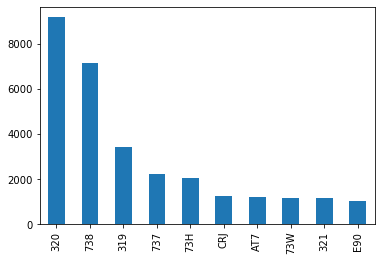

In [9]:
# df["Equipment"].hist()  # this takes to long and does not give a proper image
equip_counts[equip_counts > 1000].plot(kind="bar")

In [13]:
(df["Airline"] == "LH").sum()

923